# Unit 2: Exploratory Data Analysis and Visualization I

| Start Time | End Time | Length | Agenda                                       |
|------------|----------|--------|:---------------------------------------------|
| 10:00am    | 10:40am  | 40 min | Unit 1 - Introduction and Administration     |
| 11:00am    | 11:40am  | 40 min | **Unit 2 - EDA and DataViz I**               |
| 11:40am    | 12:20pm  | 40 min | Lunch                                        |
| 12:20pm    | 12:50pm  | 30 min | Unit 3 - EDA and DataViz II                  |
| 13:10pm    | 13:50pm  | 40 min | Unit 4 - Ingest and Basic Stats              |
| 14:10pm    | 14:50pm  | 40 min | Unit 5 - Finance in R                        |
| 14:50pm    | 15:00pm  | 10 min | Wrap-Up                                      |

## Tidy Data

*Tidy* data:

- Data arranged in a "sensible" structure for analysis
- Simple design:
    - observations in rows; different measured quantities in columns
    - The `data frame` is the prototypical tidy data
- Huge impact:
    - Tidy workflow is modular and composable $\implies$ think less, do more

(This is a good way to organize spreadsheets as well!)
- `graphics`

# Data Visualization

## `ggplot2`


`R` has (at least) 3 different plotting systems: "base", "lattice", and "ggplot2"

We will focus on one  -- `ggplot2`

Developed by former Rice professor Hadley Wickham

Implements a *grammar of graphics* ("gg")

## The `ggplot2` philosophy

Any (good) graphic is a combination of simple elements which can be combined
programmatically

There should be a one-to-one mapping between observations and points on the plot

There should be a one-to-one mapping between measurement characteristics of the plot

Less is more

## Flights Data

We will use the `flights` data set from the `nycflights13` package

This contains info on all flights departing the big three NYC airports (EWR, JFK LGA) in 2013

In [1]:
library(tibble)
library(dplyr)
library(nycflights13)
data(flights)
flights


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [2]:
glimpse(flights)

Observations: 336,776
Variables: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013...
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 55...
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 60...
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2,...
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 8...
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 8...
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7,...
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6"...
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301...
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N...
$ origin        

## Your first ggplot

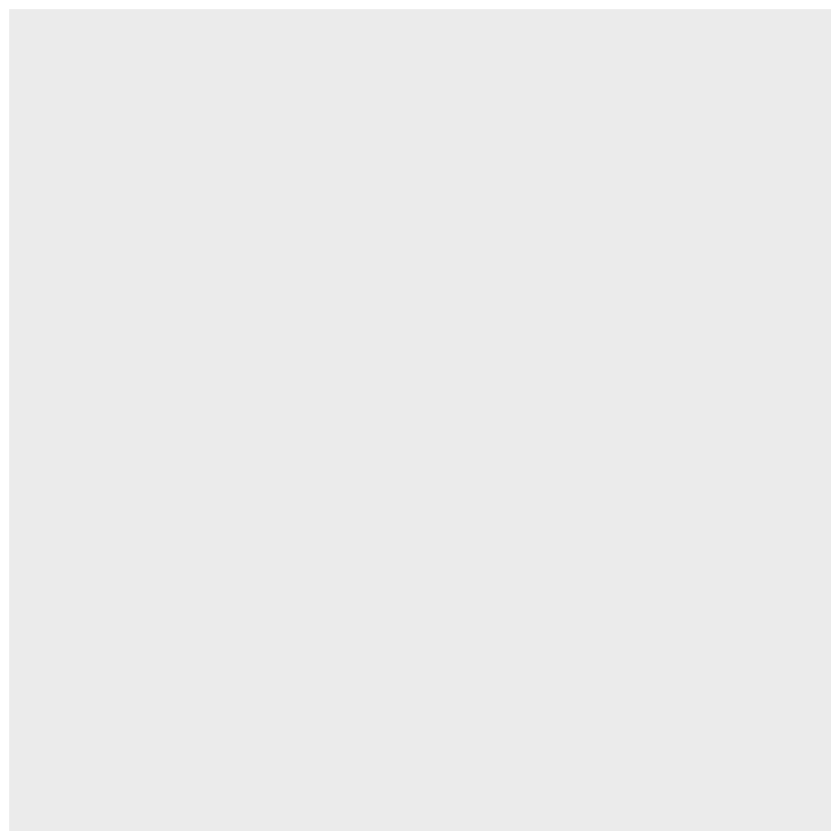

In [3]:
library(ggplot2)
ggplot(flights)

We need to map _features_ of the data (variables) to _aesthetic_ elements of the plot

`aes` function does this

Important aesthetics: 
- `x`
- `y`
- `color`
- `size`
- `group`

Use as a second argument to `ggplot`

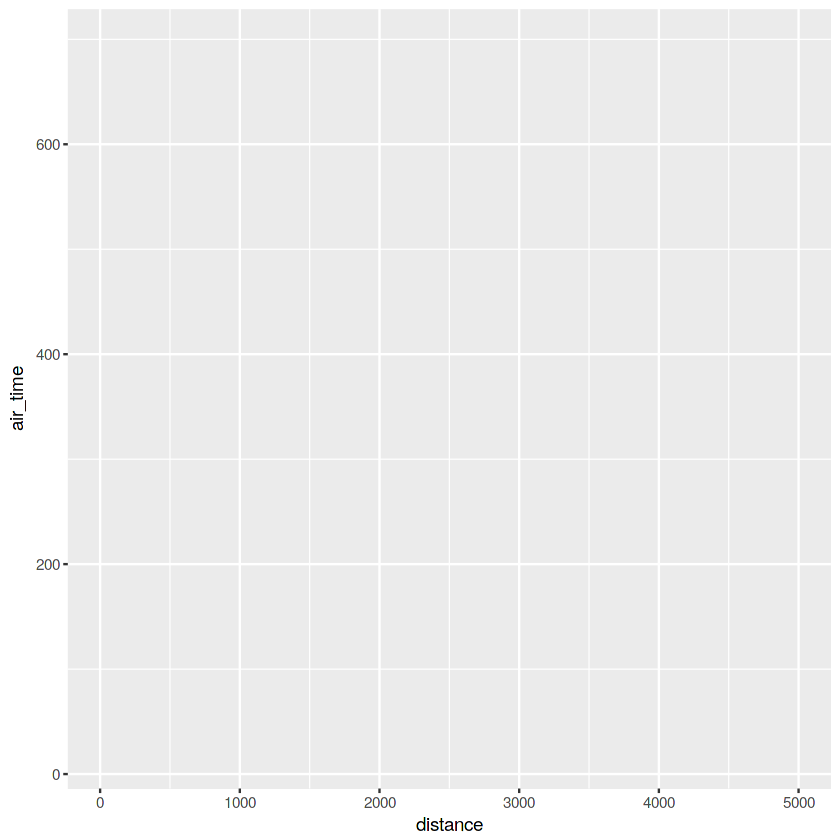

In [4]:
ggplot(flights, aes(x=distance, y=air_time))

### `geom`

To get a useful graph, we also need to plot elements -- "geoms" in `ggplot` lingo

Simplest and most useful: `geom_point`

Also useful: `geom_line` and `geom_jitter`

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

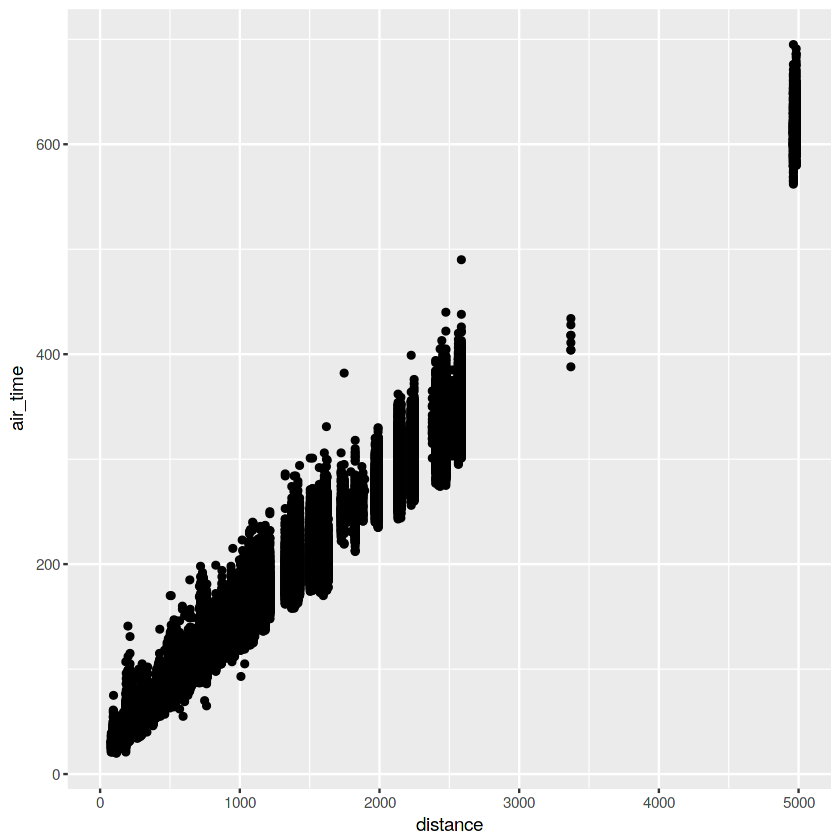

In [5]:
ggplot(flights, aes(x=distance, y=air_time)) + 
    geom_point()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

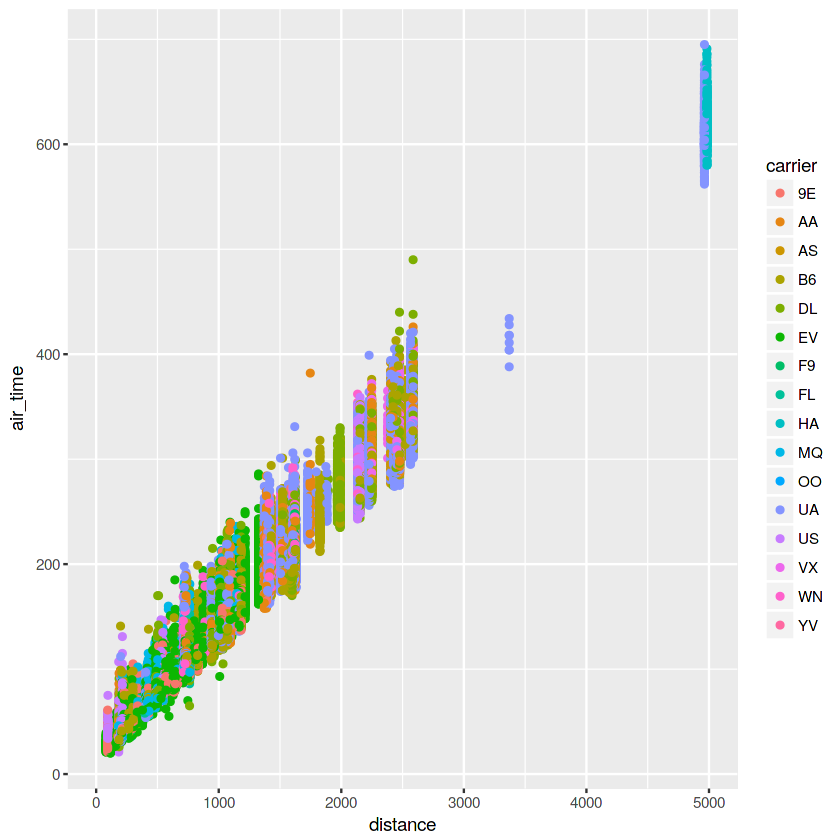

In [6]:
## For the most part, geoms and aes work together as you'd expect
ggplot(flights, aes(x=distance, y=air_time, color=carrier)) + 
    geom_point()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

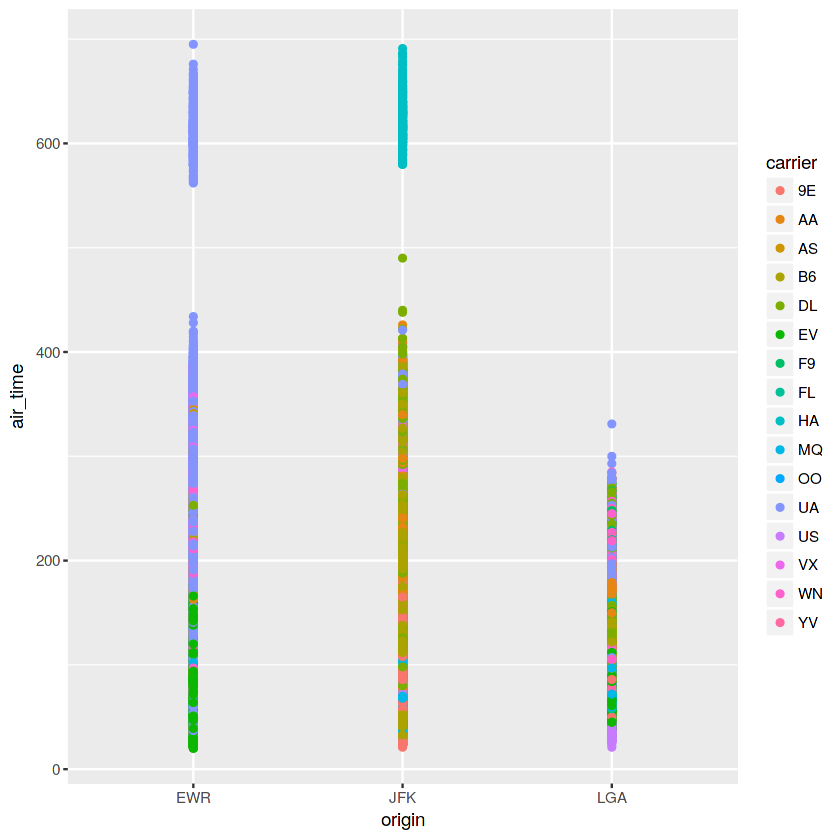

In [7]:
ggplot(flights, aes(x=origin, y=air_time, color=carrier)) + 
    geom_point()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

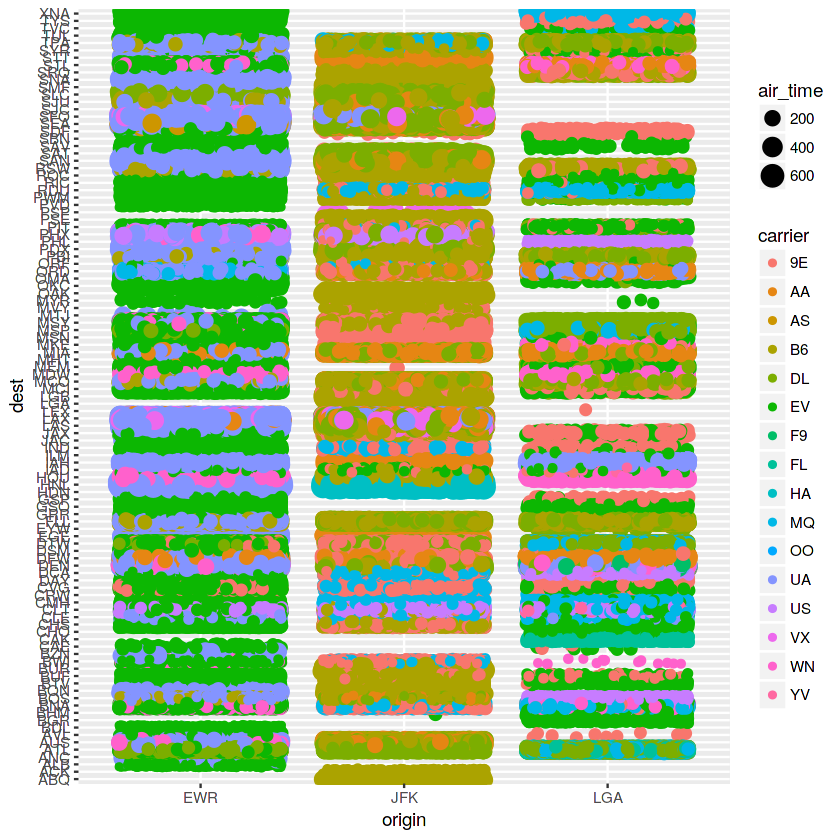

In [8]:
## Nothing stops you from making terrible plots
## We'll see below how to do a sane version of this plot
ggplot(flights, aes(x=origin, y=dest, color=carrier, size=air_time)) + geom_jitter()

### `stat`

Sometimes rather than raw data, we want to plot some sort of statistical summary -- we do this using
`stat`

Examples: 
- `stat_smooth` for smooth trends (e.g., forecasts)
- `stat_density` for density estimates

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 9430 rows containing non-finite values (stat_smooth).”

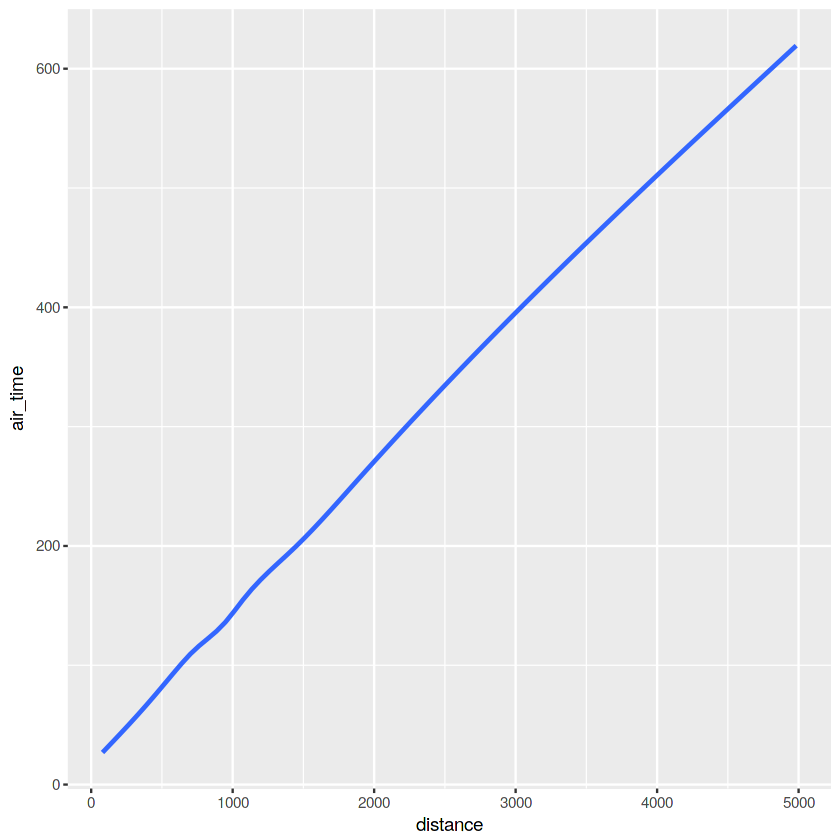

In [9]:
ggplot(flights, aes(x=distance, y=air_time)) + stat_smooth()

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 9430 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9430 rows containing missing values (geom_point).”

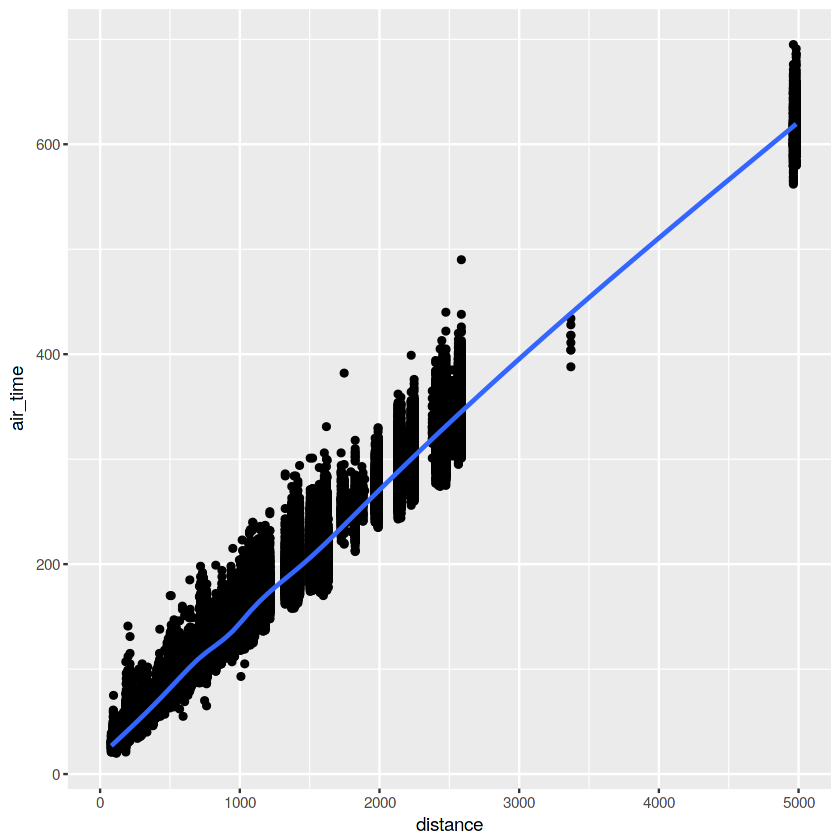

In [10]:
ggplot(flights, aes(x=distance, y=air_time)) + geom_point() + stat_smooth()

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 9430 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9430 rows containing missing values (geom_point).”

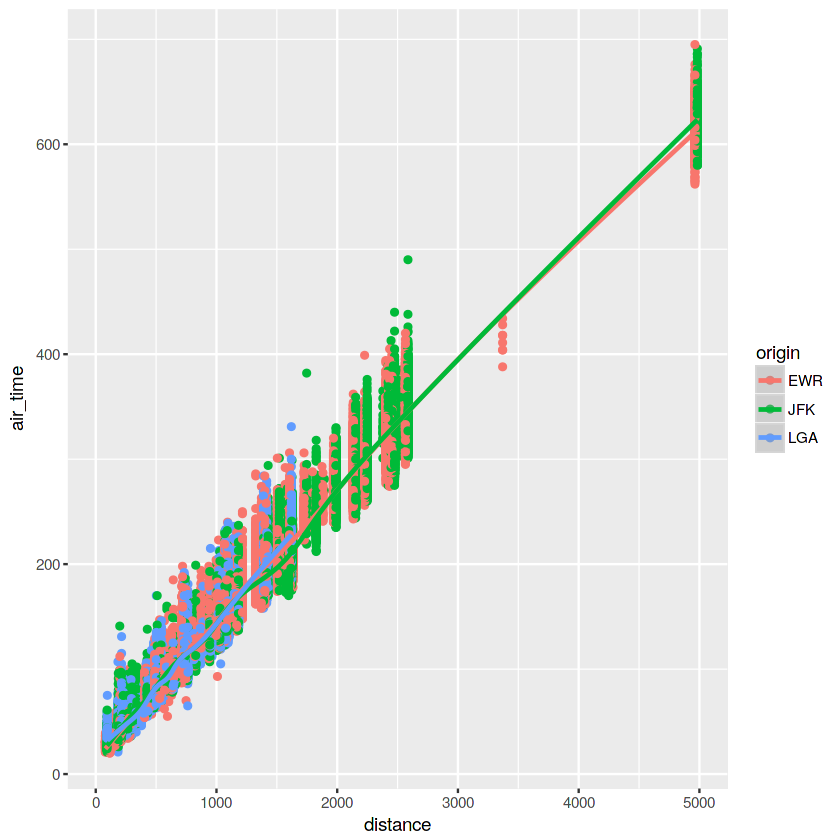

In [11]:
ggplot(flights, aes(x=distance, y=air_time, color=origin, group=origin)) + geom_point() + stat_smooth()

Warning message:
“Removed 9430 rows containing non-finite values (stat_density).”

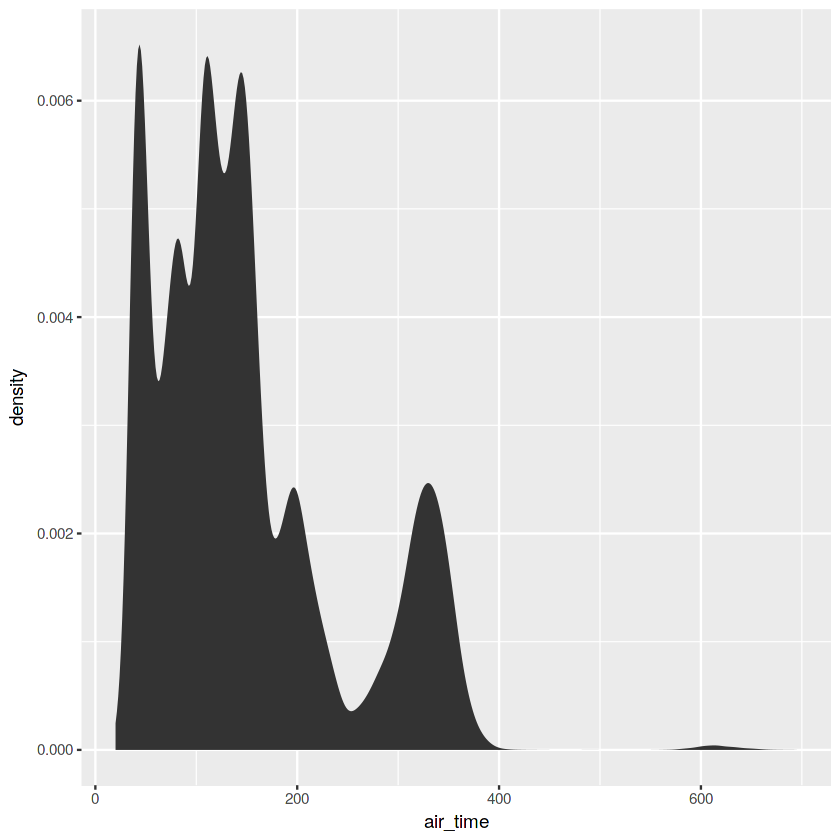

In [12]:
ggplot(flights, aes(x=air_time)) + stat_density()

Warning message:
“Removed 9430 rows containing non-finite values (stat_density).”

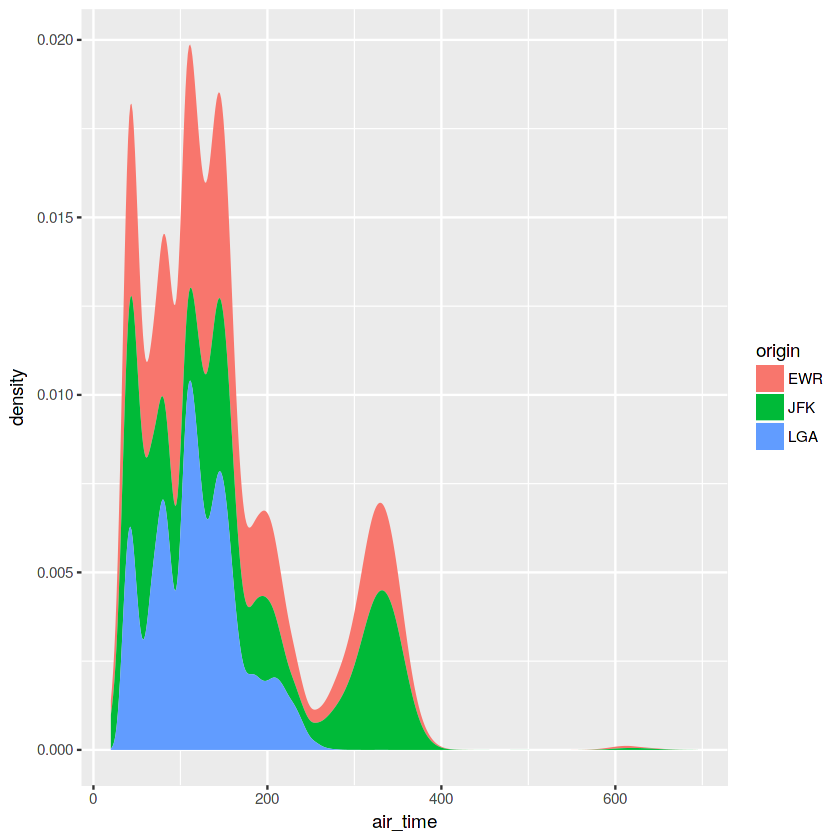

In [13]:
## Note that this isn't color (== border)
ggplot(flights, aes(x=air_time, fill=origin)) + stat_density()

### Labels and titles

Labels and titles are _added_ using the `xlab`, `ylab`, and `ggtitle` functions

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

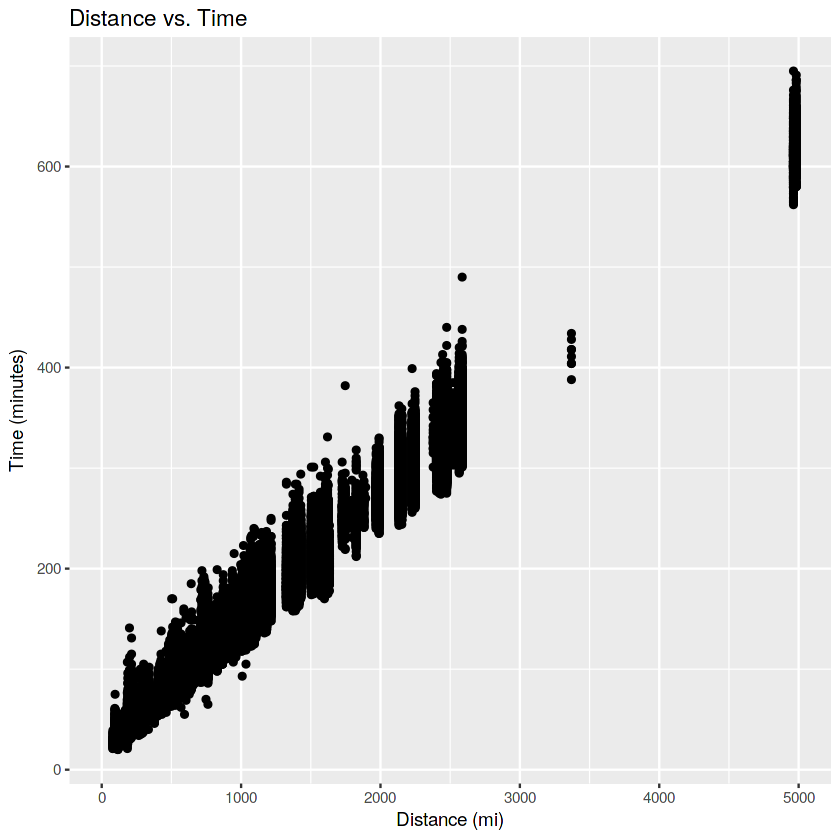

In [14]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time")

### Themes

The "look-and-feel" of a `ggplot` is controled by its theme

The entire theme is customizable, but there are some built-in are good for most plots

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

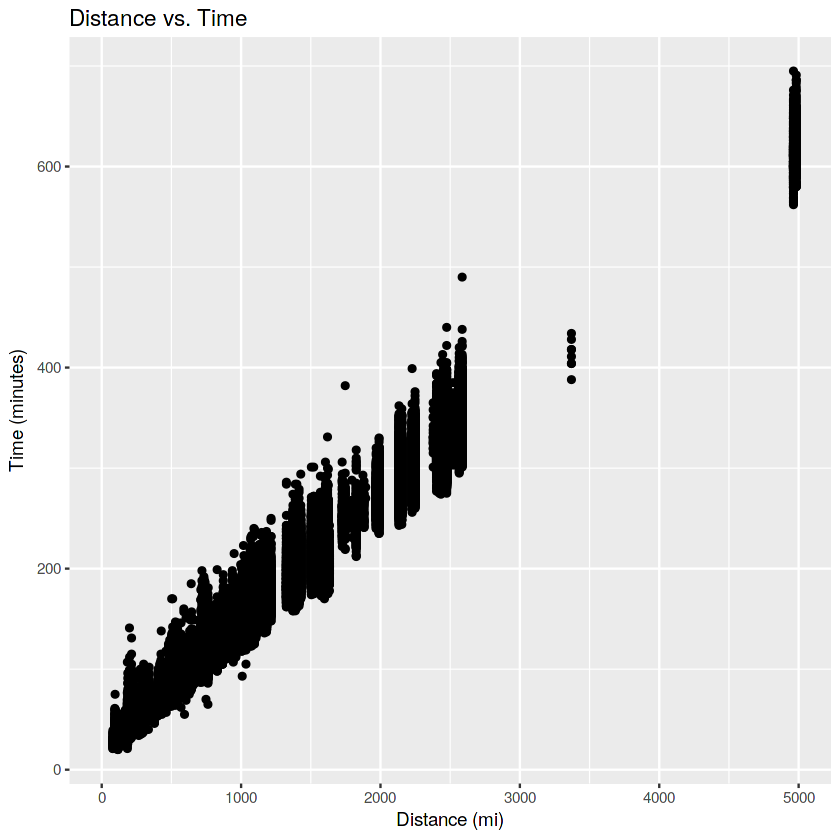

In [15]:
## Default is theme_grey()
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_grey()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

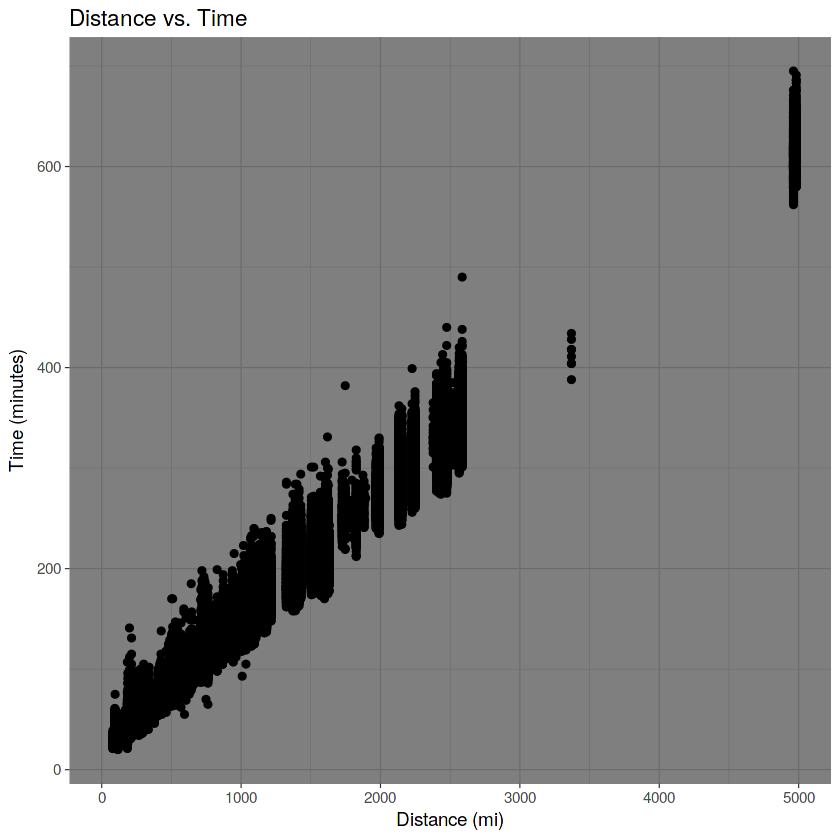

In [16]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_dark()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

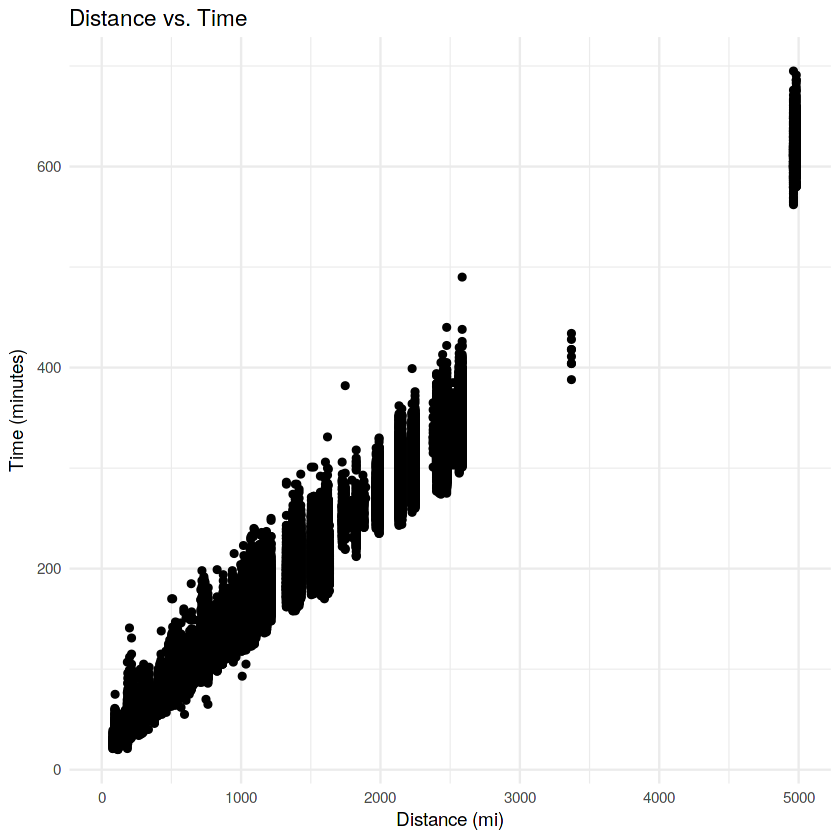

In [17]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_minimal()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

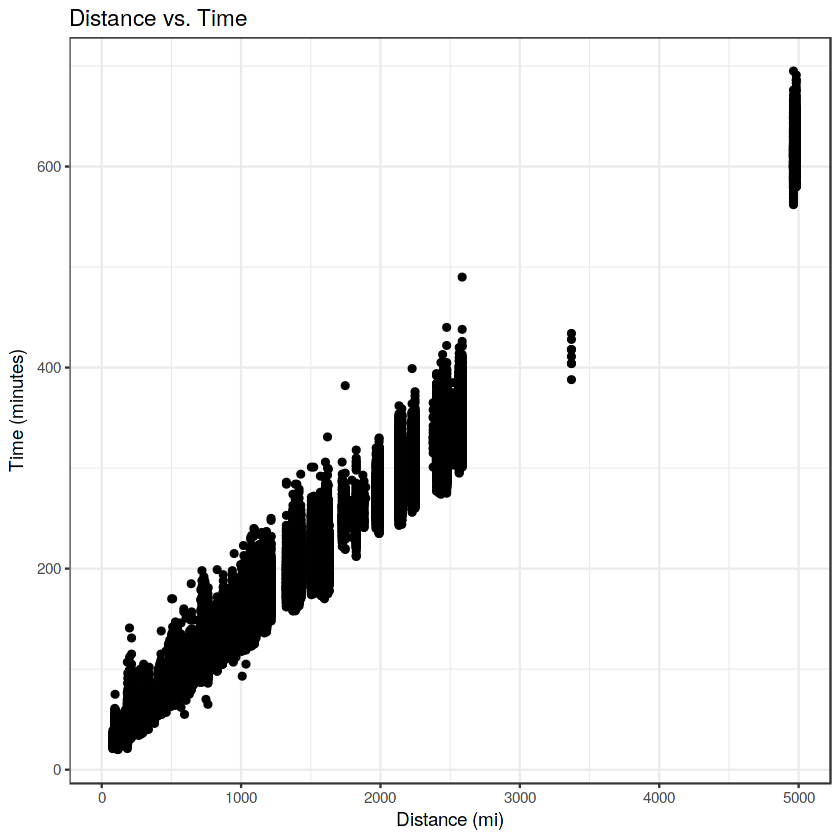

In [18]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_bw()

We can get more themes through the `ggthemes` package

In [ ]:
library(ggthemes)
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_economist()

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

In [ ]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_wsj()

In [ ]:
ggplot(flights, aes(x=distance, y=air_time)) +
    geom_point() + xlab("Distance (mi)") + ylab("Time (minutes)") +
    ggtitle("Distance vs. Time") + theme_excel()

By default, `ggplot2` maps features to our data as you would expect. 

If you want more control, look into "scales"

# Tidy Data Manipulation

Like `ggplot2`'s grammar of graphics, we can also consider a "grammar of data manipulation"

`dplyr` provides the basic **verbs** for data manipulation

Heavily inspired by SQL

*Composition of simple components leads to elegant complex transformations*

## Verbs: `select`

The most important `dplyr` "verb": `select`

Take a (subset) of columns from a data frame

In [ ]:
library(dplyr)
select(flights, month, day, flight)

In [ ]:
## Use a - sign to _drop_ a column
select(flights, -month, day, flight)

In [ ]:
## Comes with useful helpers to select groups of columns

## To get arrival details
select(flights, contains("arr_"))

## Aside -- the pipe!

![pipe](https://upload.wikimedia.org/wikipedia/en/b/b9/MagrittePipe.jpg)

Use the `%>%` (pipe) operator to chain together function calls

`a(b(x))` is equivalent to `b(x) %>% a` or even `x %>% b %>% a`

In [ ]:
mutate(flights, date=paste(year, month, day, sep="-")) %>% select(-year, -month, -day)

## Verbs: `filter`

Take a subset of observations

In [ ]:
## Flights where we aren't missing the delay
flights %>% filter(!is.na(arr_delay))

## Verbs: `mutate` and `transform`

Create new columns from existing columns

In [ ]:
mutate(flights, date = paste(year, month, day, sep="-"))

## The `GROUP BY` Paradigm

So far, we have only manipulated our data on a per observation basis

What if we want to work with our data in some sort of "chunks"? 

This is the **group by** paradigm. 

For example, what if we want to know the average delay by airline? 

In [ ]:
## Fist we group by carrier then summarize
flights %>% group_by(carrier) %>% summarize(average_delay = mean(arr_delay))

In [ ]:
## Not great -- we forgot to drop the missing data
flights %>% filter(!is.na(arr_delay)) %>% group_by(carrier) %>% summarize(average_delay=mean(arr_delay))

In [ ]:
## Useful magic function -- n() gives the number of elements in each group
fdata <- flights %>% filter(!is.na(arr_delay)) %>% group_by(carrier) %>% summarize(average_delay=mean(arr_delay), n=n())
fdata

In [ ]:
ggplot(fdata, aes(x=carrier, y=average_delay)) + geom_point()

In [ ]:
## We can compute more interesting summaries this way: e.g., 
## total flight hours by carrier and month

fdata <- flights %>% filter(!is.na(air_time)) %>% group_by(carrier, month) %>% 
                     summarize(n=n(), mean_time = mean(air_time)) 
ggplot(fdata, aes(x=month, y=mean_time, group=carrier, color=carrier)) + geom_line()

## `facet`: Visual Group By

When using multiple group-by operators, we might want to break up our plot to respect the group structure

This can be done using `facet`s in `ggplot2`

In [ ]:
ggplot(flights, aes(x=air_time, y=arr_delay)) + facet_grid(carrier~month) + geom_point()

In [ ]:
fdata <- flights %>% filter(!is.na(air_time)) %>% mutate(month=factor(month, labels=month.abb)) %>%
          group_by(carrier, month) %>% summarize(n=n(), mean_time = mean(air_time)) 
ggplot(fdata, aes(x=month, y=mean_time)) + geom_point() + facet_wrap(~carrier) + 
    xlab("Month") + ylab("Mean Flight Time") + ggtitle("Average Monthly Flight Time by Carrier") + 
    theme_bw()

In [ ]:
fdata <- flights %>% filter(!is.na(air_time)) %>% 
         group_by(carrier, month, origin) %>% 
         summarize(mean_time = mean(air_time), mean_dist=mean(distance)) 

ggplot(fdata, aes(x=mean_dist, y=mean_dist, color=carrier)) + 
    geom_point() + facet_wrap(~origin) + xlab("Flight Distance") + ylab("Average Flight Time") + 
    ggtitle("Average Flight Time by Airline and Origin") + theme_bw()

In [ ]:
fdata <- flights %>% filter(!is.na(air_time)) %>% 
         group_by(carrier, month, origin) %>% 
         summarize(mean_time = mean(air_time), mean_dist=mean(distance)) 

ggplot(fdata, aes(x=mean_dist, y=mean_dist, color=month)) + 
    geom_point() + facet_wrap(~origin) + xlab("Flight Distance") + ylab("Average Flight Time") + 
    ggtitle("Average Flight Time by Airline and Month") + theme_bw()

In [ ]:
ggplot(fdata, aes(x=mean_dist, y=mean_dist, color=factor(month))) + 
    geom_jitter() + facet_wrap(~origin) + xlab("Flights Distance") + ylab("Average Flight Time") + 
    ggtitle("Average Flight Time by Airline and Month") + theme_bw()